Assignment 2

In [445]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import salem
import cartopy.crs as ccrs
import pandas as pd
from dask.diagnostics import ProgressBar
import cartopy.feature as cfeature

In [4]:
ls /mnt/Metservice_WRF/

GLW_20000101000000.nc*     RH_20131201000000.nc*      TD_20070101000000.nc*
GLW_20000201000000.nc*     RH_20140101000000.nc*      TD_20070201000000.nc*
GLW_20000301000000.nc*     RH_20140201000000.nc*      TD_20070301000000.nc*
GLW_20000401000000.nc*     RH_20140301000000.nc*      TD_20070401000000.nc*
GLW_20000501000000.nc*     RH_20140401000000.nc*      TD_20070501000000.nc*
GLW_20000601000000.nc*     RH_20140501000000.nc*      TD_20070601000000.nc*
GLW_20000701000000.nc*     RH_20140601000000.nc*      TD_20070701000000.nc*
GLW_20000801000000.nc*     RH_20140701000000.nc*      TD_20070801000000.nc*
GLW_20000901000000.nc*     RH_20140801000000.nc*      TD_20070901000000.nc*
GLW_20001001000000.nc*     RH_20140901000000.nc*      TD_20071001000000.nc*
GLW_20001101000000.nc*     RH_20141001000000.nc*      TD_20071101000000.nc*
GLW_20001201000000.nc*     RH_20141101000000.nc*      TD_20071201000000.nc*
GLW_20010101000000.nc*     RH_20141201000000.nc*      TD_20080101000000.nc*
GLW_20010201

In [512]:
u_files=sorted(glob.glob('/mnt/Metservice_WRF/U_*',recursive=False))
v_files=sorted(glob.glob('/mnt/Metservice_WRF/V_*',recursive=False))#Extracting the U and V files

In [513]:
u_files

['/mnt/Metservice_WRF/U_20000101000000.nc',
 '/mnt/Metservice_WRF/U_20000201000000.nc',
 '/mnt/Metservice_WRF/U_20000301000000.nc',
 '/mnt/Metservice_WRF/U_20000401000000.nc',
 '/mnt/Metservice_WRF/U_20000501000000.nc',
 '/mnt/Metservice_WRF/U_20000601000000.nc',
 '/mnt/Metservice_WRF/U_20000701000000.nc',
 '/mnt/Metservice_WRF/U_20000801000000.nc',
 '/mnt/Metservice_WRF/U_20000901000000.nc',
 '/mnt/Metservice_WRF/U_20001001000000.nc',
 '/mnt/Metservice_WRF/U_20001101000000.nc',
 '/mnt/Metservice_WRF/U_20001201000000.nc',
 '/mnt/Metservice_WRF/U_20010101000000.nc',
 '/mnt/Metservice_WRF/U_20010201000000.nc',
 '/mnt/Metservice_WRF/U_20010301000000.nc',
 '/mnt/Metservice_WRF/U_20010401000000.nc',
 '/mnt/Metservice_WRF/U_20010501000000.nc',
 '/mnt/Metservice_WRF/U_20010601000000.nc',
 '/mnt/Metservice_WRF/U_20010701000000.nc',
 '/mnt/Metservice_WRF/U_20010801000000.nc',
 '/mnt/Metservice_WRF/U_20010901000000.nc',
 '/mnt/Metservice_WRF/U_20011001000000.nc',
 '/mnt/Metservice_WRF/U_20011101

In [514]:
v_files

['/mnt/Metservice_WRF/V_20000101000000.nc',
 '/mnt/Metservice_WRF/V_20000201000000.nc',
 '/mnt/Metservice_WRF/V_20000301000000.nc',
 '/mnt/Metservice_WRF/V_20000401000000.nc',
 '/mnt/Metservice_WRF/V_20000501000000.nc',
 '/mnt/Metservice_WRF/V_20000601000000.nc',
 '/mnt/Metservice_WRF/V_20000701000000.nc',
 '/mnt/Metservice_WRF/V_20000801000000.nc',
 '/mnt/Metservice_WRF/V_20000901000000.nc',
 '/mnt/Metservice_WRF/V_20001001000000.nc',
 '/mnt/Metservice_WRF/V_20001101000000.nc',
 '/mnt/Metservice_WRF/V_20001201000000.nc',
 '/mnt/Metservice_WRF/V_20010101000000.nc',
 '/mnt/Metservice_WRF/V_20010201000000.nc',
 '/mnt/Metservice_WRF/V_20010301000000.nc',
 '/mnt/Metservice_WRF/V_20010401000000.nc',
 '/mnt/Metservice_WRF/V_20010501000000.nc',
 '/mnt/Metservice_WRF/V_20010601000000.nc',
 '/mnt/Metservice_WRF/V_20010701000000.nc',
 '/mnt/Metservice_WRF/V_20010801000000.nc',
 '/mnt/Metservice_WRF/V_20010901000000.nc',
 '/mnt/Metservice_WRF/V_20011001000000.nc',
 '/mnt/Metservice_WRF/V_20011101

In [515]:
u_files_2010=sorted(glob.glob("/mnt/Metservice_WRF/U_2010*",recursive=False))
u_files_2011=sorted(glob.glob("/mnt/Metservice_WRF/U_2011*",recursive=False))
u_files_2012=sorted(glob.glob("/mnt/Metservice_WRF/U_2012*",recursive=False))#Organising the U files from 2010-2012 into yearly data
u_files_3yrs=u_files_2010+u_files_2011+u_files_2012#Adding all the yearly U data together

In [516]:
v_files_2010=sorted(glob.glob("/mnt/Metservice_WRF/V_2010*",recursive=False))
v_files_2011=sorted(glob.glob("/mnt/Metservice_WRF/V_2011*",recursive=False))
v_files_2012=sorted(glob.glob("/mnt/Metservice_WRF/V_2012*",recursive=False))#Organising the V files from 2010-2012 into yearly data
v_files_3yrs=v_files_2010+v_files_2011+v_files_2012#Adding all the yearly V data together

Q.1

In [517]:
with ProgressBar():
    ds_u = xr.open_mfdataset(u_files_3yrs,chunks={"height":1,"time":72},parallel=True)
    ds_v = xr.open_mfdataset(v_files_3yrs,chunks={"height":1,"time":72},parallel=True)

[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.4s


In [518]:
u_ht=ds_u.U.isel(height=0)
v_ht=ds_v.V.isel(height=0)

In [588]:
with ProgressBar():
    WS=np.sqrt(u_ht**2+v_ht**2)#Calculating the wind speed

In [589]:
print(WS)

<xarray.DataArray (time: 26304, lat: 508, lon: 472)>
dask.array<sqrt, shape=(26304, 508, 472), dtype=float32, chunksize=(72, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 ... 2012-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0


In [590]:
coordinates = [
    {"Place":"Le Bons Bay", "Latitude": -43.7348842, "Longitude": 173.10710490},
    {"Place":"Kaikoura", "Latitude": -42.1404, "Longitude": 173.6808},
    {"Place":"Lyttleton Harbour", "Latitude": -43.6167, "Longitude": 173.7333},
    {"Place":"Christchurch", "Latitude": -43.531, "Longitude": 172.6365},
    {"Place":"Lake Tekapo", "Latitude": -43.8833, "Longitude": 170.5167},
    {"Place":"Darfield", "Latitude": -43.48949967, "Longitude": 172.11188790},
    {"Place":"Rangiora", "Latitude": -43.303356, "Longitude": 172.595718},
    {"Place": "Pukaki Aerodrome", "Latitude": -44.23694, "Longitude": 170.11889},
    {"Place": "Winchmore", "Latitude": -43.82829840, "Longitude": 171.72055260},
    {"Place": "Fairlie", "Latitude": -44.09965095, "Longitude": 170.82863810},
    {"Place": "Mt Cook Village", "Latitude": -43.73333, "Longitude": 173.09556},
    {"Place": "Timaru", "Latitude": -44.39306, "Longitude": 171.25083},
    {"Place": "Culverden", "Latitude": -43.7725929, "Longitude": 172.8493942},
    {"Place": "Hanmer Springs", "Latitude": -43.52525471, "Longitude": 172.83463050}
]#Creating the dictionary of locations

In [595]:
coordinates = [
    "Le Bons Bay" {"Latitude": -43.7348842, "Longitude": 173.10710490},
    "Kaikoura" {"Latitude": -42.1404, "Longitude": 173.6808},
    "Lyttleton Harbour" {"Latitude": -43.6167, "Longitude": 173.7333},
    "Christchurch" {"Latitude": -43.531, "Longitude": 172.6365},
    "Lake Tekapo" {"Latitude": -43.8833, "Longitude": 170.5167},
    "Darfield" {"Latitude": -43.48949967, "Longitude": 172.11188790},
    "Rangiora" {"Latitude": -43.303356, "Longitude": 172.595718},
    "Pukaki Aerodrome" {"Latitude": -44.23694, "Longitude": 170.11889},
    "Winchmore" {"Latitude": -43.82829840, "Longitude": 171.72055260},
    "Fairlie" {"Latitude": -44.09965095, "Longitude": 170.82863810},
    "Mt Cook Village" {"Latitude": -43.73333, "Longitude": 173.09556},
    "Timaru" {"Latitude": -44.3906, "Longitude": 171.25083},
    "Culverden" {"Latitude": -43.7725929, "Longitude": 172.8493942},
    "Hanmer Springs" {"Latitude": -43.52525471, "Longitude": 172.83463050}
]#Creating the dictionary of locations

SyntaxError: invalid syntax (3207689434.py, line 2)

In [591]:
WS_monthlymeans=WS.groupby('time.month').mean().compute()#Calculating the monthly mean wind speed

In [592]:
print(WS_monthlymeans)

<xarray.DataArray (month: 12, lat: 508, lon: 472)>
array([[[ 9.49916  ,  9.500985 ,  9.503446 , ...,  8.984216 ,
          8.983665 ,  8.982417 ],
        [ 9.492504 ,  9.493148 ,  9.494546 , ...,  8.964649 ,
          8.965964 ,  8.96682  ],
        [ 9.492241 ,  9.493097 ,  9.49551  , ...,  8.947852 ,
          8.952094 ,  8.956656 ],
        ...,
        [ 6.556265 ,  6.5523844,  6.5534863, ...,  6.2295794,
          6.23127  ,  6.2296257],
        [ 6.5580316,  6.551011 ,  6.546522 , ...,  6.225487 ,
          6.226739 ,  6.2223883],
        [ 6.556899 ,  6.5511317,  6.5468087, ...,  6.2146387,
          6.21389  ,  6.210796 ]],

       [[ 8.122238 ,  8.123082 ,  8.126089 , ...,  8.340716 ,
          8.343764 ,  8.346071 ],
        [ 8.112276 ,  8.11548  ,  8.120446 , ...,  8.320144 ,
          8.322283 ,  8.323464 ],
        [ 8.102328 ,  8.105843 ,  8.109863 , ...,  8.298747 ,
          8.299687 ,  8.298698 ],
...
        [ 6.07108  ,  6.0685267,  6.067178 , ...,  6.9570947,
    

In [610]:
WS_df={location: WS for attribute, WS in zip(coordinates, WS_monthlymeans)}#Incorporating the dictionary into the monthly mean wind speed data

TypeError: unhashable type: 'list'

In [527]:
print(u_ht)

<xarray.DataArray 'U' (time: 26304, lat: 508, lon: 472)>
dask.array<getitem, shape=(26304, 508, 472), dtype=float32, chunksize=(72, 508, 472), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 ... 2012-12-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0


In [528]:
print(WS_d)

{'Le Bons Bay': <xarray.DataArray (lat: 508, lon: 472)>
array([[9.49916  , 9.500985 , 9.503446 , ..., 8.984216 , 8.983665 ,
        8.982417 ],
       [9.492504 , 9.493148 , 9.494546 , ..., 8.964649 , 8.965964 ,
        8.96682  ],
       [9.492241 , 9.493097 , 9.49551  , ..., 8.947852 , 8.952094 ,
        8.956656 ],
       ...,
       [6.556265 , 6.5523844, 6.5534863, ..., 6.2295794, 6.23127  ,
        6.2296257],
       [6.5580316, 6.551011 , 6.546522 , ..., 6.225487 , 6.226739 ,
        6.2223883],
       [6.556899 , 6.5511317, 6.5468087, ..., 6.2146387, 6.21389  ,
        6.210796 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0
    month    int64 1, 'Kaikoura': <xarray.DataArray (lat: 508, lon: 472)>
array([[8.122238 , 8.123082 , 8.126089 , ..., 8.340716 , 8.343764 ,
        8.346071 ],
       [8.112276 , 8.11548  ,

In [576]:
WS_df=pd.DataFrame(WS_d, index=coordinates, columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Ann'])#Converting the data into a dataframe

In [577]:
WS_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ann
"{'Place': 'Le Bons Bay', 'Latitude': -43.7348842, 'Longitude': 173.1071049}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Kaikoura', 'Latitude': -42.1404, 'Longitude': 173.6808}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Lyttleton Harbour', 'Latitude': -43.6167, 'Longitude': 173.7333}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Christchurch', 'Latitude': -43.531, 'Longitude': 172.6365}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Lake Tekapo', 'Latitude': -43.8833, 'Longitude': 170.5167}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Darfield', 'Latitude': -43.48949967, 'Longitude': 172.1118879}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Rangiora', 'Latitude': -43.303356, 'Longitude': 172.595718}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Pukaki Aerodrome', 'Latitude': -44.23694, 'Longitude': 170.11889}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Winchmore', 'Latitude': -43.8282984, 'Longitude': 171.7205526}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Fairlie', 'Latitude': -44.09965095, 'Longitude': 170.8286381}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [558]:
WS_df.index.name="Location"

In [475]:
WS_df.columns=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Ann"]

In [601]:
WS_df["Ann"]=WS_df.mean(axis=1)#Determining the axis values

In [602]:
pd.options.display.float_format="{:.1f}".format#Rounding the values to one decimal place

In [603]:
print(WS_df)

                                                    Jan  Feb  Mar  Apr  May  \
{'Place': 'Le Bons Bay', 'Latitude': -43.734884...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Kaikoura', 'Latitude': -42.1404, 'Lo...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Lyttleton Harbour', 'Latitude': -43....  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Christchurch', 'Latitude': -43.531, ...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Lake Tekapo', 'Latitude': -43.8833, ...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Darfield', 'Latitude': -43.48949967,...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Rangiora', 'Latitude': -43.303356, '...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Pukaki Aerodrome', 'Latitude': -44.2...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Winchmore', 'Latitude': -43.8282984,...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Fairlie', 'Latitude': -44.09965095, ...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Mt Cook Village', 'Latitude': -43.73...  NaN  NaN  NaN  NaN  NaN   
{'Place': 'Timaru', 'Latitude': -44.39306, 'Lon...  

In [599]:
WS_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ann
"{'Place': 'Le Bons Bay', 'Latitude': -43.7348842, 'Longitude': 173.1071049}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Kaikoura', 'Latitude': -42.1404, 'Longitude': 173.6808}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Lyttleton Harbour', 'Latitude': -43.6167, 'Longitude': 173.7333}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Christchurch', 'Latitude': -43.531, 'Longitude': 172.6365}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Lake Tekapo', 'Latitude': -43.8833, 'Longitude': 170.5167}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Darfield', 'Latitude': -43.48949967, 'Longitude': 172.1118879}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Rangiora', 'Latitude': -43.303356, 'Longitude': 172.595718}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Pukaki Aerodrome', 'Latitude': -44.23694, 'Longitude': 170.11889}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Winchmore', 'Latitude': -43.8282984, 'Longitude': 171.7205526}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{'Place': 'Fairlie', 'Latitude': -44.09965095, 'Longitude': 170.8286381}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Q.2

In [217]:
rn_file=xr.open_dataset("/mnt/Metservice_WRF/RAINNC_20100101000000.nc")#Extracting the rainfall data
rn_file['RAINNC']=rn_file['RAINNC'].astype(float)#Changing the data to float
rn_file_20100101=rn_file.RAINNC.sel(time=slice("2010-01-01","2010-01-01"))#Slice the first day of January 2010

In [218]:
LeBonsBay_rn=rn_file_20100101.sel(lat=-43.73458842,lon=173.10710490,method="nearest")
LeBonsBay_rn_hrly=rn_file.groupby("time.hour")#Creating an hourly rainfall file specific to each location

In [254]:
Kaikoura_rn=rn_file_20100101.sel(lat=-42.4104,lon=173.6808,method="nearest")
Kaikoura_rn_hrly=rn_file.groupby("time.hour")

In [220]:
LyttletonHarbour_rn=rn_file_20100101.sel(lat=-43.6167,lon=173.7333,method="nearest")
LyttletonHarbour_rn_hrly=rn_file.groupby("time.hour")

In [222]:
Christchurch_rn=rn_file_20100101.sel(lat=-43.531,lon=172.6365,method="nearest")
Christchurch_rn_hrly=rn_file.groupby("time.hour")

In [223]:
LakeTekapo_rn=rn_file_20100101.sel(lat=-43.8833,lon=170.5167,method="nearest")
LakeTekapo_rn_hrly=rn_file.groupby("time.hour")

In [224]:
Darfield_rn=rn_file_20100101.sel(lat=-43.48949967,lon=172.11188790,method="nearest")
Darfield_rn_hrly=rn_file.groupby("time.hour")

In [225]:
Rangiora_rn=rn_file_20100101.sel(lat=-43.303356,lon=172.595718,method="nearest")
Rangiora_rn_hrly=rn_file.groupby("time.hour")

In [226]:
PukakiAerodrome_rn=rn_file_20100101.sel(lat=-44.23694,lon=170.11889,method="nearest")
PukakiAerodrome_rn_hrly=rn_file.groupby("time.hour")

In [227]:
Winchmore_rn=rn_file_20100101.sel(lat=-43.82829840,lon=171.72055260,method="nearest")
Minchmore_rn_hrly=rn_file.groupby("time.hour")

In [228]:
Fairlie_rn=rn_file_20100101.sel(lat=-44.09965095,lon=170.82863810,method="nearest")
Fairlie_rn_hrly=rn_file.groupby("time.hour")

In [229]:
MtCookVillage_rn=rn_file_20100101.sel(lat=-43.73333,lon=173.09556,method="nearest")
LeBonsBay_rn_hrly=rn_file.groupby("time.hour")

In [230]:
Timaru_rn=rn_file_20100101.sel(lat=-44.39306,lon=171.25083,method="nearest")
Timaru_rn_hrly=rn_file.groupby("time.hour")

In [231]:
Culverden_rn=rn_file_20100101.sel(lat=-43.7725929,lon=172.8493942,method="nearest")
Culverden_rn_hrly=rn_file.groupby("time.hour")

In [232]:
HanmerSprings_rn=rn_file_20100101.sel(lat=-43.52525471,lon=172.83463050,method="nearest")
HanmerSprings_rn_hrly=rn_file.groupby("time.hour")

In [255]:
fs=10#Assigning the font size

In [210]:
position=[1]
len(LeBonsBay_rn)
len(Kaikoura_rn)
len(LyttletonHarbour_rn)

24

Text(0.5, 1.0, 'Le Bons Bay Hourly Rainfall')

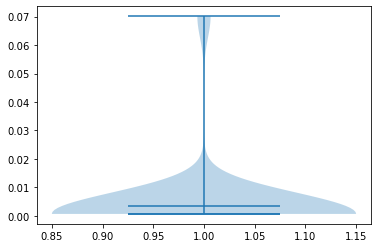

In [256]:
LB_vp=plt.violinplot(LeBonsBay_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Le Bons Bay Hourly Rainfall',fontsize=fs) #Creating the violin plots for each location

Text(0.5, 1.0, 'Kaikoura Hourly Rainfall')

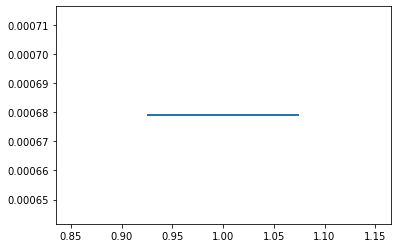

In [249]:
K_vp=plt.violinplot(Kaikoura_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Kaikoura Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Lyttleton Harbour Rainfall')

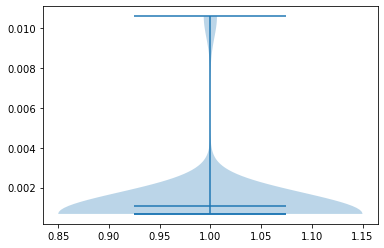

In [238]:
LH_f=plt.violinplot(LyttletonHarbour_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Lyttleton Harbour Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Christchurch Hourly Rainfall')

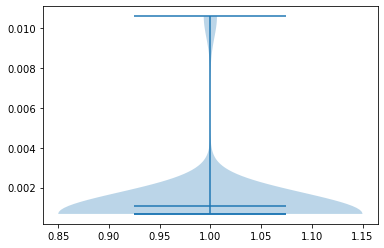

In [239]:
C_f=plt.violinplot(Christchurch_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Christchurch Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Lake Tekapo Hourly Rainfall')

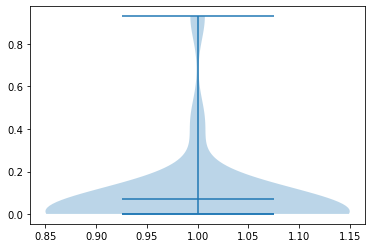

In [240]:
LT_f=plt.violinplot(LakeTekapo_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Lake Tekapo Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Darfield Hourly Rainfall')

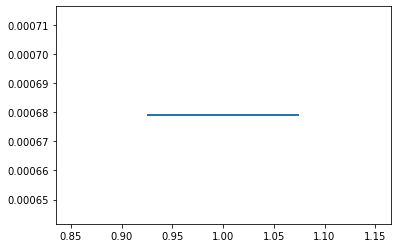

In [241]:
D_f=plt.violinplot(Darfield_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Darfield Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Rangiora Hourly Rainfall')

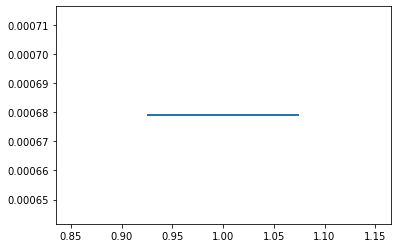

In [242]:
R_f=plt.violinplot(Rangiora_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Rangiora Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Pukaki Aerodrome Hourly Rainfall')

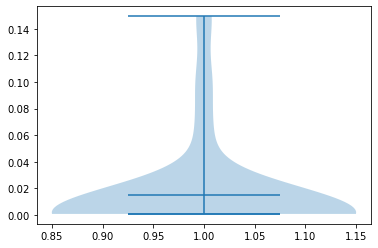

In [245]:
PA_vp=plt.violinplot(PukakiAerodrome_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Pukaki Aerodrome Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Winchmore Hourly Rainfall')

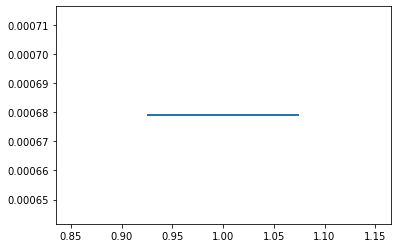

In [244]:
W_vp=plt.violinplot(Winchmore_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Winchmore Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Fairlie Hourly Rainfall')

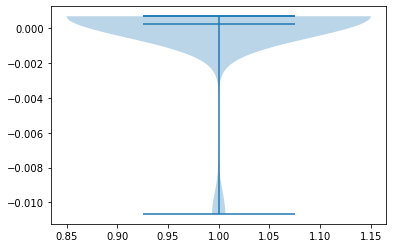

In [246]:
F_vp=plt.violinplot(Fairlie_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Fairlie Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Mt Cook Village Hourly Rainfall')

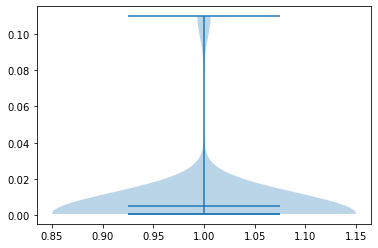

In [247]:
MCV_vp=plt.violinplot(MtCookVillage_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Mt Cook Village Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Timaru Hourly Rainfall')

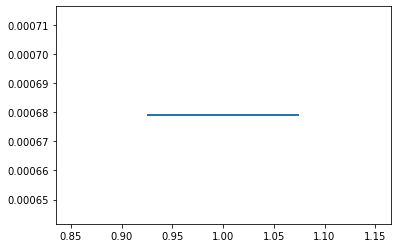

In [250]:
T_vp=plt.violinplot(Timaru_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Timaru Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Culverden Hourly Rainfall')

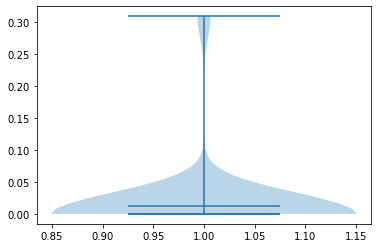

In [251]:
C_vp=plt.violinplot(Culverden_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Culverden Hourly Rainfall',fontsize=fs)

Text(0.5, 1.0, 'Hanmer Springs Hourly Rainfall')

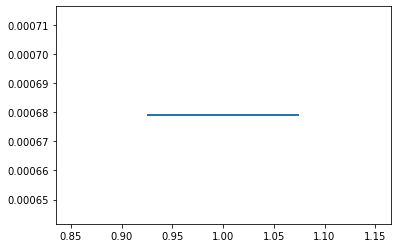

In [252]:
HS_vp=plt.violinplot(HanmerSprings_rn,position,points=100,widths=0.3,showmeans=True,showextrema=True,showmedians=True)
ax[0,0].set_title('Hanmer Springs Hourly Rainfall',fontsize=fs)

Q.3

In [257]:
t_files=sorted(glob.glob("/mnt/Metservice_WRF/T_*",recursive=False))

In [258]:
t_files

['/mnt/Metservice_WRF/T_20000101000000.nc',
 '/mnt/Metservice_WRF/T_20000201000000.nc',
 '/mnt/Metservice_WRF/T_20000301000000.nc',
 '/mnt/Metservice_WRF/T_20000401000000.nc',
 '/mnt/Metservice_WRF/T_20000501000000.nc',
 '/mnt/Metservice_WRF/T_20000601000000.nc',
 '/mnt/Metservice_WRF/T_20000701000000.nc',
 '/mnt/Metservice_WRF/T_20000801000000.nc',
 '/mnt/Metservice_WRF/T_20000901000000.nc',
 '/mnt/Metservice_WRF/T_20001001000000.nc',
 '/mnt/Metservice_WRF/T_20001101000000.nc',
 '/mnt/Metservice_WRF/T_20001201000000.nc',
 '/mnt/Metservice_WRF/T_20010101000000.nc',
 '/mnt/Metservice_WRF/T_20010201000000.nc',
 '/mnt/Metservice_WRF/T_20010301000000.nc',
 '/mnt/Metservice_WRF/T_20010401000000.nc',
 '/mnt/Metservice_WRF/T_20010501000000.nc',
 '/mnt/Metservice_WRF/T_20010601000000.nc',
 '/mnt/Metservice_WRF/T_20010701000000.nc',
 '/mnt/Metservice_WRF/T_20010801000000.nc',
 '/mnt/Metservice_WRF/T_20010901000000.nc',
 '/mnt/Metservice_WRF/T_20011001000000.nc',
 '/mnt/Metservice_WRF/T_20011101

In [264]:
t_files_2010=sorted(glob.glob("/mnt/Metservice_WRF/T_2010*",recursive=False))
t_files_2011=sorted(glob.glob("/mnt/Metservice_WRF/T_2011*",recursive=False))
t_files_2012=sorted(glob.glob("/mnt/Metservice_WRF/T_2012*",recursive=False))
t_files_3yrs=t_files_2010+t_files_2011+t_files_2012

In [260]:
t_ds=xr.open_mfdataset(t_files_3yrs,chunks={"height":1,"time":72},parallel=True)

In [274]:
t_ht=t_ds.T.isel(height=0)

In [281]:
t_htc=t_ht - 273.15

In [282]:
with ProgressBar():
    t_mean=t_htc.groupby("time.year").mean()
    t_mn=t_mean.median("year")

In [309]:
vmin=0
vmax=20#Setting the minimum and maximum for the color scale range

In [285]:
lon_min,lon_max=169.544779,174.054927
lat_min,lat_max=-45.082949,-41.909034#Setting the map extent to the coordinates for Canterbury

In [384]:
projections=ccrs.Orthographic()

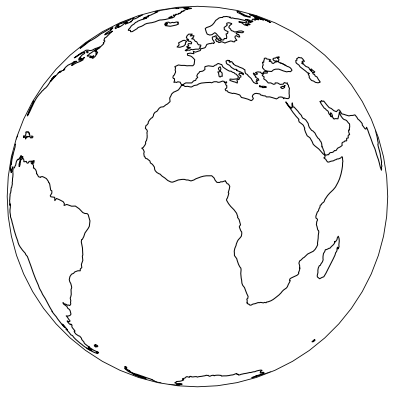

In [381]:
fig,ax=plt.subplots(figsize=(10,7),subplot_kw=dict(projection=projection))
ax.coastlines()

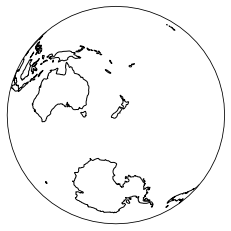

In [362]:
ax=plt.axes(projection=ccrs.Orthographic(170, -45))
ax.coastlines()

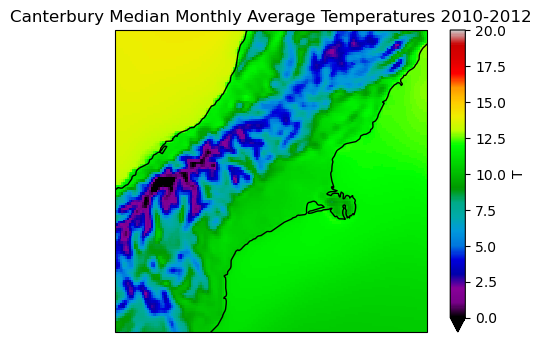

In [416]:
ax=plt.axes(projection=ccrs.Orthographic(170, -45))#Setting the central latitude and longitude
ax.coastlines()#Adding the coastlines
t_mn.plot(ax=ax,transform=t_mn.salem.cartopy(),cmap='nipy_spectral',vmin=vmin,vmax=vmax,add_colorbar=True)#Ensuring salem can find the coordinates, setting the colour scheme and the color scale
ax.set_extent([lon_min,lon_max,lat_min,lat_max])#Setting extent
ax.set_title('Canterbury Median Monthly Average Temperatures 2010-2012')#Setting the title
fig=plt.gcf()
fig.set_dpi(100)
ax.stock_img()#Creating the Canterbury temperature map

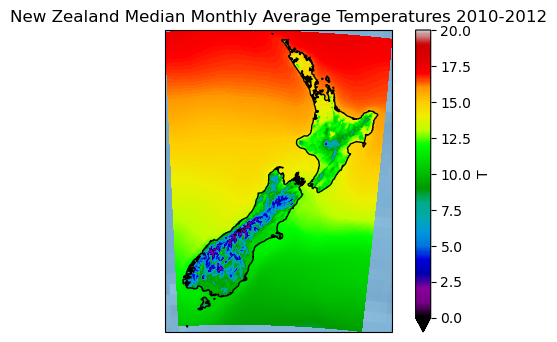

In [417]:
ax=plt.axes(projection=ccrs.Orthographic(170, -45))
ax.coastlines()
t_mn.plot(ax=ax,transform=t_mn.salem.cartopy(),cmap='nipy_spectral',vmin=vmin,vmax=vmax,add_colorbar=True)
ax.set_title('New Zealand Median Monthly Average Temperatures 2010-2012')
fig=plt.gcf()
fig.set_dpi(100)
ax.stock_img()#Creating the New Zealand temperature map

Q.4

In [401]:
rn_files=sorted(glob.glob("/mnt/Metservice_WRF/RAINNC_*",recursive=False))#Extracting the rainfall files

In [402]:
rn_files

['/mnt/Metservice_WRF/RAINNC_20000101000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20000201000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20000301000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20000401000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20000501000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20000601000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20000701000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20000801000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20000901000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20001001000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20001101000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20001201000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20010101000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20010201000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20010301000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20010401000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20010501000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20010601000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20010701000000.nc',
 '/mnt/Metservice_WRF/RAINNC_20010801000000.nc',
 '/mnt/Metservice_WR

In [403]:
rn_files_2010=sorted(glob.glob("/mnt/Metservice_WRF/RAINNC_2010*",recursive=False))
rn_files_2011=sorted(glob.glob("/mnt/Metservice_WRF/RAINNC_2011*",recursive=False))
rn_files_2012=sorted(glob.glob("/mnt/Metservice_WRF/RAINNC_2012*",recursive=False))#Organising the rainfall files from 2010-2012 into yearly data
rn_files_3yrs=rn_files_2010+rn_files_2011+rn_files_2012#Adding the rainfall data from all three years

In [404]:
rn_ds=xr.open_mfdataset(rn_files_3yrs,chunks={"time":72},parallel=True)

In [405]:
with ProgressBar():
    rn_mean=rn_ds.groupby("time.year").sum()#Grouping the data into years and determing the sum of each year
    rn_mn=rn_mean.median("year")#Determing the median values

In [423]:
rmin=0
rmax=9000#Setting the minimum and maximum values for the colour scale

In [408]:
projections=ccrs.Orthographic()

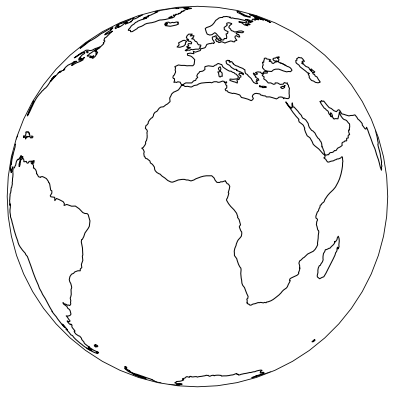

In [409]:
fig,ax=plt.subplots(figsize=(10,7),subplot_kw=dict(projection=projection))
ax.coastlines()

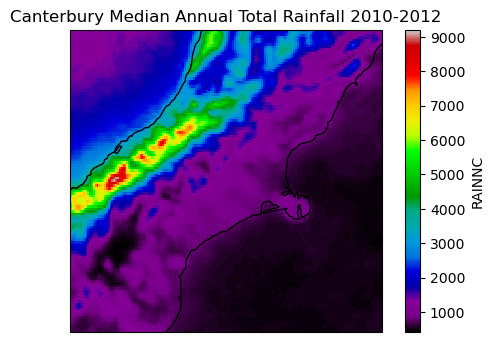

In [422]:
ax=plt.axes(projection=ccrs.Orthographic(170, -45))#Setting the central latitude and longitude
ax.coastlines()#Adding the coastlines
rn_mn.RAINNC.plot(ax=ax,transform=rn_mn.salem.cartopy(),cmap='nipy_spectral',add_colorbar=True)#Ensuring salem can find the coordinates, setting the colour scheme and colour scale
ax.set_extent([lon_min,lon_max,lat_min,lat_max])#Setting the extent
ax.set_title('Canterbury Median Annual Total Rainfall 2010-2012')#Setting the title
fig=plt.gcf()
fig.set_dpi(100)
ax.stock_img()#Creating the Canterbury rainfall map

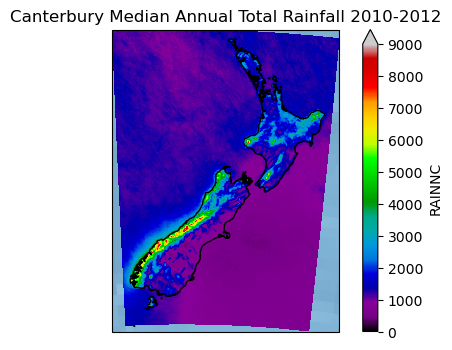

In [421]:
ax=plt.axes(projection=ccrs.Orthographic(170, -45))
ax.coastlines()
rn_mn.RAINNC.plot(ax=ax,transform=rn_mn.salem.cartopy(),cmap='nipy_spectral',vmin=rmin,vmax=rmax,add_colorbar=True)
ax.set_title('Canterbury Median Annual Total Rainfall 2010-2012')
fig=plt.gcf()
fig.set_dpi(100)
ax.stock_img()#Creating the New Zealand rainfall map